In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
params = {
    'axes.labelsize': 'x-large',
    'ytick.labelsize': 'large',
    'xtick.labelsize': 'large'
}

rcParams.update(params)

sns.set_style('whitegrid')

## Datos

Corresponde un proceso simulado de flujo de una mezcla de hidrocarburos que fluyen por una tuberia en la cual ocurre fugas del material

In [3]:
main_folder = 'files/'

df = pd.read_csv(main_folder + 'fuga_data.csv')

In [4]:
df.head()

,P1 (Pa),T1 (C),MF1 (kg/s),P2 (Pa),T2 (C),MF2 (kg/s),MF leak (kg/s),stroke_level,caso,status_leak,Pos (m),Dia (m),x_L,t (s)
0,"568,097.30",-41.77,37.83,"352,683.30",-41.82,37.83,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,620.44"
1,"568,098.20",-41.77,37.84,"353,449.80",-41.82,37.70,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,620.94"
2,"568,783.20",-41.77,37.83,"353,587.30",-41.82,37.67,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,621.67"
3,"569,367.30",-41.77,37.81,"353,654.80",-41.82,37.67,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,622.10"
4,"569,933.50",-41.77,37.77,"353,706.80",-41.82,37.69,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,622.64"


In [5]:
df['t'] = pd.to_timedelta(df['t (s)'], unit='s')

In [6]:
df.set_index('t', inplace=True)

In [7]:
df.head()

,P1 (Pa),T1 (C),MF1 (kg/s),P2 (Pa),T2 (C),MF2 (kg/s),MF leak (kg/s),stroke_level,caso,status_leak,Pos (m),Dia (m),x_L,t (s)
t,,,,,,,,,,,,,,
0 days 00:27:00.442000,"568,097.30",-41.77,37.83,"352,683.30",-41.82,37.83,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,620.44"
0 days 00:27:00.944731800,"568,098.20",-41.77,37.84,"353,449.80",-41.82,37.70,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,620.94"
0 days 00:27:01.674772,"568,783.20",-41.77,37.83,"353,587.30",-41.82,37.67,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,621.67"
0 days 00:27:02.095696,"569,367.30",-41.77,37.81,"353,654.80",-41.82,37.67,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,622.10"
0 days 00:27:02.642430,"569,933.50",-41.77,37.77,"353,706.80",-41.82,37.69,0.00,30.00,1.00,0.00,0.00,0.00,0.00,"1,622.64"


### Simple grafico de comparacion

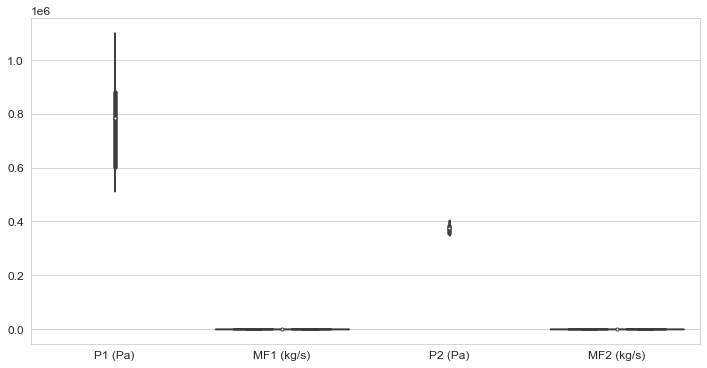

In [8]:
plt.subplots(figsize=(12, 6))
_ = sns.violinplot(data=df[['P1 (Pa)','MF1 (kg/s)', 'P2 (Pa)', 'MF2 (kg/s)']])

Debido a la diferencia en los ordenes de magnitud que cada uno de los features, la comparacion grafica en unidades de ingenieria no es util

## Normalizacion

Cuando se habla de normalizar, lo que se desea es escalar todos los valores entre 0 y 1. Y lo que se necesita es establecer cuales son los valores minimo y maximo. Existen varias opciones aca les presento como usar el objeto **MinMaxScaler** disponible **sklearn**

In [9]:
valores = df[['P1 (Pa)','MF1 (kg/s)', 'P2 (Pa)', 'MF2 (kg/s)']].values

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(valores)

In [11]:
pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
             index=['Min', 'Max'],
             columns=['P1 (Pa)','MF1 (kg/s)', 'P2 (Pa)', 'MF2 (kg/s)'])

,P1 (Pa),MF1 (kg/s),P2 (Pa),MF2 (kg/s)
Min,"567,569.70",36.79,"352,683.30",36.79
Max,"1,046,568.00",250.27,"400,311.70",250.37


### Ejemplo de normalización

Para normalizar los datos, se usa la función ''transform''

In [12]:
normalizados = scaler.transform(valores)
df_normalizados = pd.DataFrame(normalizados,
                              index=df.index,
                              columns=['P1 (Pa)','MF1 (kg/s)', 'P2 (Pa)', 'MF2 (kg/s)'])

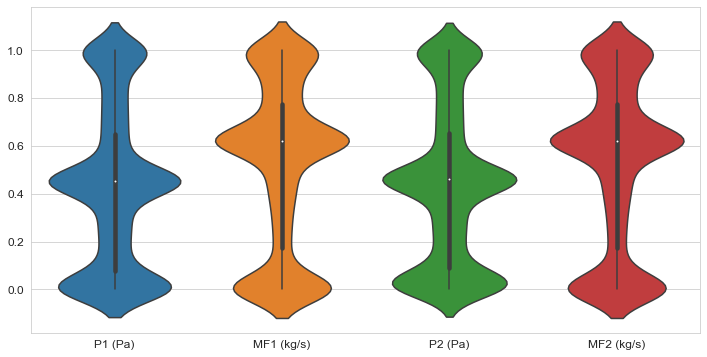

In [13]:
plt.subplots(figsize=(12, 6))
_ = sns.violinplot(data=df_normalizados)

In [14]:
for i in range(10):
    print(normalizados[i, :])

[0.00110147 0.00486725 0.         0.00488827]
[0.00110334 0.00490781 0.01609334 0.00428855]
[0.00253341 0.00487591 0.01898027 0.00413722]
[0.00375283 0.0047574  0.02039749 0.00415282]
[0.00493488 0.00458174 0.02148928 0.00423124]
[0.00543655 0.00442688 0.02182731 0.00432741]
[0.00530733 0.00429759 0.02145989 0.00440204]
[0.00477183 0.00418887 0.02054237 0.00442512]
[0.00409834 0.00409813 0.0193729  0.0043835 ]
[0.00350857 0.00402459 0.01828531 0.0042826 ]


### Ejemplo de inversión

Los datos normalizados pueden ser facilmente escalados, a las unidades de ingeniería, empleando la función 'inverse_transform'

In [15]:
unidades_ing = scaler.inverse_transform(normalizados)
for i in range(10):
    print(unidades_ing[i,:])

[5.680973e+05 3.783052e+01 3.526833e+05 3.783052e+01]
[5.680982e+05 3.783918e+01 3.534498e+05 3.770243e+01]
[5.687832e+05 3.783237e+01 3.535873e+05 3.767011e+01]
[5.693673e+05 3.780707e+01 3.536548e+05 3.767344e+01]
[5.699335e+05 3.776957e+01 3.537068e+05 3.769019e+01]
[5.701738e+05 3.773651e+01 3.537229e+05 3.771073e+01]
[5.701119e+05 3.770891e+01 3.537054e+05 3.772667e+01]
[5.698554e+05 3.768570e+01 3.536617e+05 3.773160e+01]
[5.695328e+05 3.766633e+01 3.536060e+05 3.772271e+01]
[5.692503e+05 3.765063e+01 3.535542e+05 3.770116e+01]


## Estandarizacion

En este proceso se escalan los valores de forma tal que la media sea igual a cero y la desviacion estandar igual a 1. A diferencia que la normalizacion, ésta supone que las observaciones siguen una distribución Gaussiana.

Por esta razón, se debe verificar y transformar los datos (de ser necesario) antes de aplicar.


### Ejemplo de estandarización

Para ejemplo de estandarización usaremos solo los datos de P2

In [16]:
valores2 = df['P2 (Pa)'].values

Cuando se trabaja con una sola serie, los valores son extraidos como un numpy array de una fila

In [17]:
valores2.shape

(6381,)

Sin embargo, para usar los métodos de normalización/estandarización es necesario que sean reformateado a una matrix de una columna

In [18]:
valores2 = valores2.reshape((-1,1))

In [19]:
valores2.shape

(6381, 1)

In [20]:
scaler2 = StandardScaler()
scaler2 = scaler2.fit(valores2)

Se puede conocer los estadísticos de media y desviación estandar directamente de los atributos de las función

In [21]:
print('La media de los datos es {:,.2f} Pa'.format(scaler2.mean_[0]))
print('Mientras que la desviación estándar es {:,.2f} Pa'.format(np.sqrt(scaler2.var_[0])))

La media de los datos es 373,432.22 Pa
Mientras que la desviación estándar es 15,657.25 Pa


### Ejemplo de estandarización


In [22]:
estandarizados = scaler2.transform(valores2)
for i in range(5):
    print(estandarizados[i])

[-1.32519564]
[-1.27624067]
[-1.2674588]
[-1.26314769]
[-1.25982655]


Para regresar a la escala de ingeniería

In [23]:
estandarizados_back = scaler2.inverse_transform(estandarizados)
for i in range(5):
    print(estandarizados_back[i])

[352683.3]
[353449.8]
[353587.3]
[353654.8]
[353706.8]


In [24]:
valores2[:5]

array([[352683.3],
       [353449.8],
       [353587.3],
       [353654.8],
       [353706.8]])

Text(0.5, 0, 'P2 estandarizados')

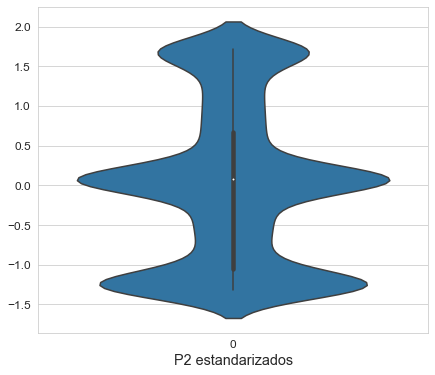

In [25]:
f, ax = plt.subplots(figsize=(7, 6))
_ = sns.violinplot(data=estandarizados)
ax.set_xlabel('P2 estandarizados')